<a href="https://colab.research.google.com/github/buterajacques1/Credit-Card-Fraud-Detection-Predictive-Models-/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv1D, Dropout, MaxPool1D, BatchNormalization
from IPython.display import SVG
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import model_to_dot, plot_model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.regularizers import l1, l2
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/credit_data.csv')

In [ ]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
45641,42436,-2.481639,-2.439949,0.363642,1.216827,2.572442,-1.264220,-0.443652,0.075853,0.073188,...,-0.039426,0.480591,1.779358,-0.756700,-0.161099,0.685617,0.223071,0.139619,0.00,0.0
45642,42436,1.223475,0.014944,0.471312,-0.038410,-0.566793,-0.867970,-0.058213,-0.144080,0.164904,...,-0.053292,-0.093680,0.106348,0.471407,0.135555,0.968336,-0.065171,0.005184,7.49,0.0
45643,42436,1.258657,0.421016,0.325437,0.684259,-0.292529,-1.052786,0.145228,-0.253567,-0.100521,...,-0.278029,-0.757417,0.119613,0.369393,0.246145,0.091553,-0.017156,0.032557,0.89,0.0
45644,42437,-0.500147,1.000770,1.809639,-0.114551,0.333865,-0.577076,1.062325,-0.513050,-0.048285,...,-0.193814,-0.161410,0.036965,0.400154,-0.802486,-0.076097,-0.214317,-0.229160,2.69,0.0
45645,42437,-0.652459,0.177290,1.955607,-1.879724,-0.368457,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45646 entries, 0 to 45645
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    45646 non-null  int64  
 1   V1      45646 non-null  float64
 2   V2      45646 non-null  float64
 3   V3      45646 non-null  float64
 4   V4      45646 non-null  float64
 5   V5      45646 non-null  float64
 6   V6      45645 non-null  float64
 7   V7      45645 non-null  float64
 8   V8      45645 non-null  float64
 9   V9      45645 non-null  float64
 10  V10     45645 non-null  float64
 11  V11     45645 non-null  float64
 12  V12     45645 non-null  float64
 13  V13     45645 non-null  float64
 14  V14     45645 non-null  float64
 15  V15     45645 non-null  float64
 16  V16     45645 non-null  float64
 17  V17     45645 non-null  float64
 18  V18     45645 non-null  float64
 19  V19     45645 non-null  float64
 20  V20     45645 non-null  float64
 21  V21     45645 non-null  float64
 22

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0.0    45503
1.0      142
Name: Class, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(45503, 31)
(142, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    45503.000000
mean        90.808470
std        240.322652
min          0.000000
25%          7.580000
50%         24.990000
75%         82.360000
max       7879.420000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     142.000000
mean       97.592183
std       233.185192
min         0.000000
25%         1.000000
50%         8.370000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,27549.332857,-0.21371,0.011525,0.732168,0.173212,-0.230885,0.106122,-0.092498,0.041321,0.169777,...,0.046284,-0.029987,-0.108242,-0.038246,0.009637,0.136319,0.021863,0.003681,0.004547,90.808470
1.0,26193.556338,-7.87188,5.609155,-10.671851,6.067972,-5.862266,-2.315720,-8.269674,3.901566,-3.650345,...,0.486666,0.898581,-0.250143,-0.300033,-0.079930,0.257712,0.163858,0.596174,0.034797,97.592183


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [ ]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [ ]:
df = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2486,2054,-0.630926,0.086120,1.959042,-0.509844,-1.489365,0.818485,0.558633,0.247151,0.322220,...,0.045608,0.261224,0.124208,0.298872,-0.444750,0.941742,-0.054190,-0.041891,200.00,0.0
20394,31010,-0.204149,0.935040,0.797376,0.968054,0.431777,0.341473,0.636392,0.021289,-0.414404,...,0.201135,0.641421,-0.158038,-0.770641,-0.552354,-0.212614,0.116924,0.169902,40.00,0.0
40884,40444,-0.508493,0.566413,1.276323,0.032914,-0.276134,-0.526344,1.312155,-0.101915,-0.724992,...,-0.299226,-1.183893,0.519158,0.347944,-0.424291,-0.058842,-0.057840,0.032508,144.90,0.0
35500,38146,1.233052,-0.862673,1.169162,-0.462610,-1.382812,0.101690,-1.104158,0.101983,-0.167242,...,0.181566,0.641206,-0.030038,0.152514,0.313136,-0.175151,0.070851,0.032973,47.00,0.0
30617,36012,0.519832,-1.022762,0.954574,1.547572,-0.799464,1.247430,-0.467276,0.489723,0.707562,...,0.078523,-0.070921,-0.154039,-0.290777,0.146453,-0.424488,0.049938,0.062820,264.14,0.0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
44091,41791,-7.222731,6.155773,-10.826460,4.180779,-6.123555,-3.114136,-6.895112,5.161516,-2.516477,...,0.912700,-0.630358,0.190887,-0.061263,0.379775,-0.266845,1.193695,0.257468,99.99,1.0
44223,41851,-19.139733,9.286847,-20.134992,7.818673,-15.652208,-1.668348,-21.340478,0.641900,-8.550110,...,-2.182692,0.520543,-0.760556,0.662767,-0.948454,0.121796,-3.381843,-1.256524,139.90,1.0
44270,41870,-20.906908,9.843153,-19.947726,6.155789,-15.142013,-2.239566,-21.234463,1.151795,-8.739670,...,-1.977196,0.652932,-0.519777,0.541702,-0.053861,0.112671,-3.765371,-1.071238,1.00,1.0
44556,41991,-4.566342,3.353451,-4.572028,3.616119,-2.493138,-1.090000,-5.551433,0.447783,-2.424414,...,2.674466,-0.020880,-0.302447,-0.086396,-0.516060,-0.295102,0.195985,0.141115,1.00,1.0
45203,42247,-2.524012,2.098152,-4.946075,6.456588,3.173921,-3.058806,-0.184710,-0.390420,-3.649812,...,0.027935,0.220366,0.976348,-0.290539,1.161002,0.663954,0.456023,-0.405682,1.00,1.0


In [ ]:
df['Class'].value_counts()

0.0    492
1.0    142
Name: Class, dtype: int64

In [ ]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,28029.727642,-0.15423,0.014262,0.711135,0.201962,-0.182490,0.111173,-0.079036,0.019209,0.096001,...,0.094075,-0.049272,-0.119553,-0.051926,-0.000969,0.148467,0.018813,0.003634,0.003793,92.636341
1.0,26193.556338,-7.87188,5.609155,-10.671851,6.067972,-5.862266,-2.315720,-8.269674,3.901566,-3.650345,...,0.486666,0.898581,-0.250143,-0.300033,-0.079930,0.257712,0.163858,0.596174,0.034797,97.592183


Finding Correlation

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Credit Card Fraud Dataset', fontsize=15)
    plt.show()

<ipython-input-61-6b92619868ef>:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.



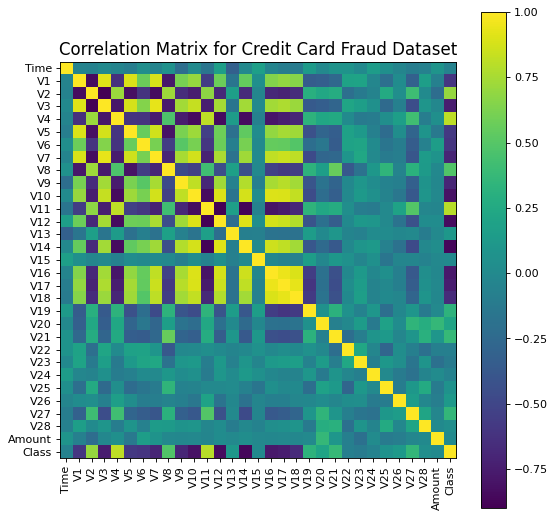

In [ ]:

plotCorrelationMatrix(df, 8)


Scatter and Density Plot

In [ ]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

<ipython-input-63-d6f0f127ac9b>:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.



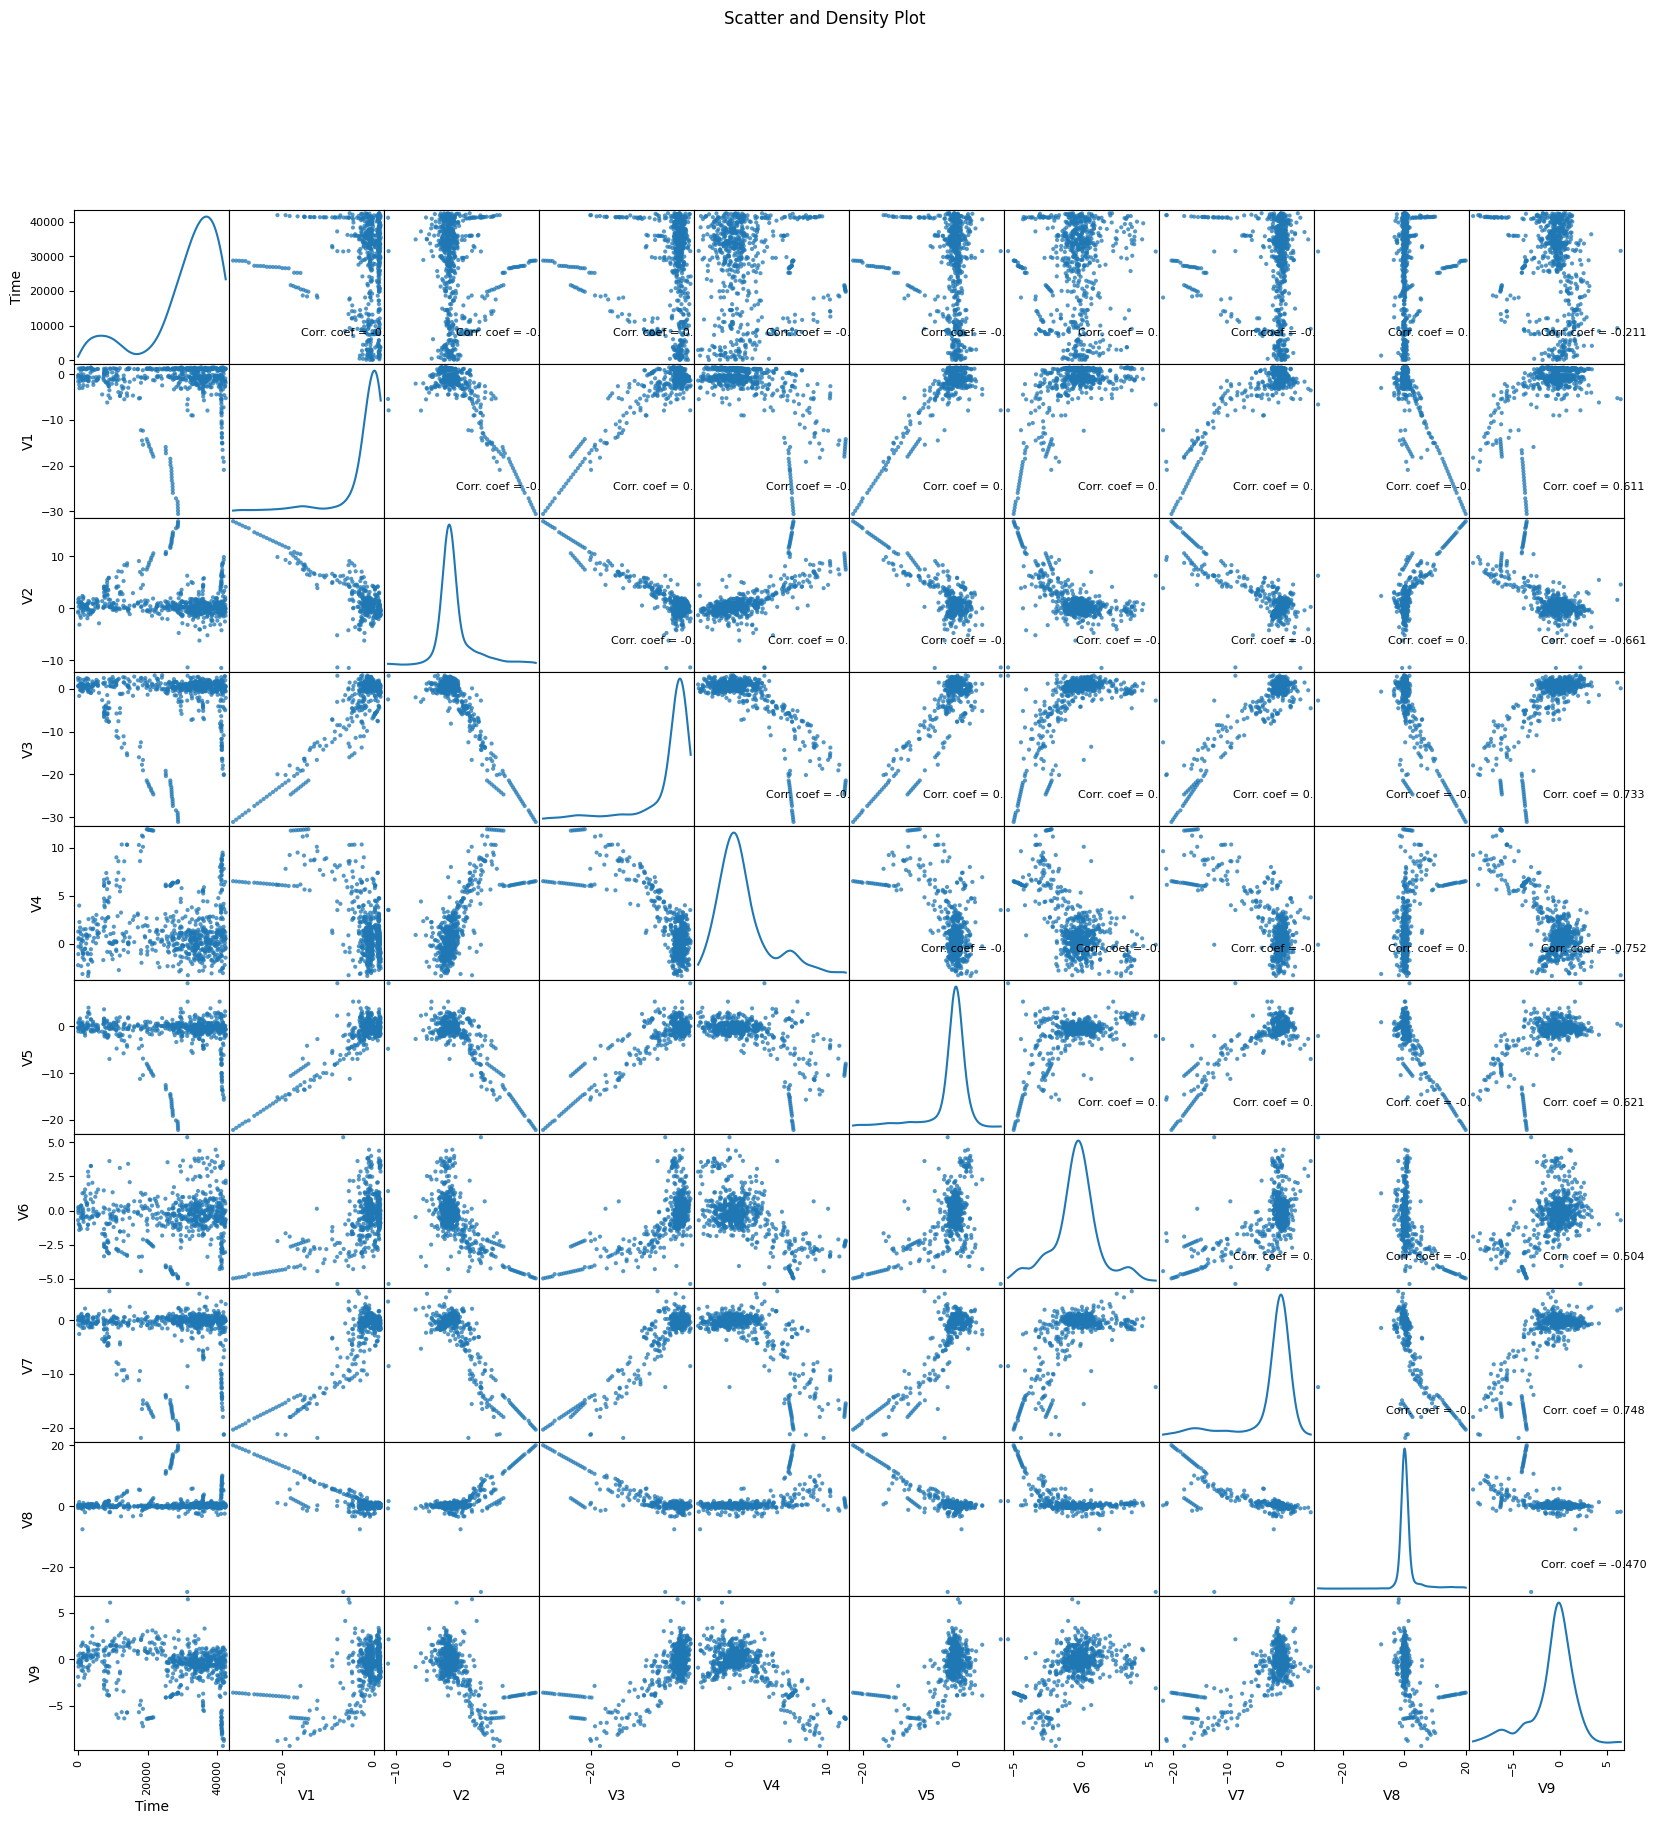

In [ ]:
plotScatterMatrix(df, 20, 8)

SECTION 2: Data Preprocessing

In [ ]:
# Define features x and y
x = df.drop(columns='Class', axis=1)
y = df['Class']


In [ ]:
print(x)

        Time         V1        V2         V3        V4         V5        V6  \
2486    2054  -0.630926  0.086120   1.959042 -0.509844  -1.489365  0.818485   
20394  31010  -0.204149  0.935040   0.797376  0.968054   0.431777  0.341473   
40884  40444  -0.508493  0.566413   1.276323  0.032914  -0.276134 -0.526344   
35500  38146   1.233052 -0.862673   1.169162 -0.462610  -1.382812  0.101690   
30617  36012   0.519832 -1.022762   0.954574  1.547572  -0.799464  1.247430   
...      ...        ...       ...        ...       ...        ...       ...   
44091  41791  -7.222731  6.155773 -10.826460  4.180779  -6.123555 -3.114136   
44223  41851 -19.139733  9.286847 -20.134992  7.818673 -15.652208 -1.668348   
44270  41870 -20.906908  9.843153 -19.947726  6.155789 -15.142013 -2.239566   
44556  41991  -4.566342  3.353451  -4.572028  3.616119  -2.493138 -1.090000   
45203  42247  -2.524012  2.098152  -4.946075  6.456588   3.173921 -3.058806   

              V7        V8        V9  ...       V20

In [ ]:
print(y)

2486     0.0
20394    0.0
40884    0.0
35500    0.0
30617    0.0
        ... 
44091    1.0
44223    1.0
44270    1.0
44556    1.0
45203    1.0
Name: Class, Length: 634, dtype: float64


In [ ]:
print(x.shape, y.shape)

(634, 30) (634,)


Split the data into Training data & Testing Data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

NameError: name 'X' is not defined

Train Model without Optimization

In [ ]:
epochs = 50
model = Sequential()
# Add convolution 2D
model.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
# Compile the model without any optimization technique
model.compile(loss=categorical_crossentropy,
              metrics=['accuracy'])
model.save('saved_models/model1.pkl')

In [ ]:
model.summary()

In [ ]:
# Train the model
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

In [ ]:
# Print the final accuracy
_, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')


In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

Model Training with Optimization Techniques

Adam Optimization

In [ ]:
model2 = Sequential()
# Add convolution 2D
model2.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(1,activation='sigmoid'))
model2.compile(optimizer=Adam(lr=0.00005),loss='binary_crossentropy',metrics=['accuracy'])
model2.save('saved_models/model2.pkl')
model2.summary()

In [ ]:
adam_model = model2.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

In [ ]:
_, train_accuracy = model2.evaluate(X_train, y_train)
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.plot(adam_model.history['accuracy'])
plt.plot(adam_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

Stochastic Gradient Descent Optimization technique

In [ ]:
model3 = Sequential()
# Add convolution 2D
model3.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Flatten())
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(1,activation='sigmoid'))


model3.compile(optimizer=SGD(0.9),loss='binary_crossentropy',metrics=['accuracy'])
model3.save('saved_models/model3.pkl')
model3.summary()

In [ ]:
sgd_model = model3.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

In [ ]:
_, train_accuracy = model3.evaluate(X_train, y_train)
test_loss, test_accuracy = model3.evaluate(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.plot(sgd_model.history['accuracy'])
plt.plot(sgd_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

Root Mean Square Propagation

In [ ]:
model4 = Sequential()
model4.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

model4.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Flatten())
model4.add(Dense(64,activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(1,activation='sigmoid'))


model4.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])
model4.save('saved_models/model4.pkl')
model4.summary()

In [ ]:
rms_model = model4.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

In [ ]:
_, train_accuracy = model4.evaluate(X_train, y_train)
test_loss, test_accuracy = model4.evaluate(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.plot(rms_model.history['accuracy'])
plt.plot(rms_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

Error Analysis: Make Predictions using the best saved model

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy_score(y_test,y_pred)
def make_predictions(model_path, X_test, y_test):
    # Load the model
    model = load_model(model_path)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    accuracy_score(y_test,y_pred)
    # Make predictions
    predictions = model.predict(X_test)

    # Convert probabilities to binary labels (0 or 1)
    predictions_labels = np.round(predictions).flatten()

    # Convert y_test to binary labels (assuming it's 0 or 1)
    true_labels = y_test

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(true_labels, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Calculate classification report
    report = classification_report(true_labels, y_pred)
    print("Classification Report:\n", report)


Without Optimization

In [ ]:
model_path = 'saved_models/model1.pkl'
make_predictions(model_path, X_test, y_test )

With Adam Optimization

In [ ]:
model_path = 'saved_models/model2.pkl'
make_predictions(model_path, X_test, y_test )

With SGD

In [ ]:
model_path = 'saved_models/model3.pkl'
make_predictions(model_path, X_test, y_test )

With RMSOp

In [ ]:
model_path = 'saved_models/model4.pkl'
make_predictions(model_path, X_test, y_test )
